In [9]:
globals().clear()

# Importing necessary libraries for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set plotting font to Segoe UI (font used for the report)
plt.rcParams['font.family'] = 'Segoe UI'

# Load the dataset
df = pd.read_csv("MissingDataTreated.csv")

# Shows relevant information: the size, columns, and data types for each variable
#print(df.info())

# price_mean = df['Price'].mean()
# print(f"The mean of target 'Price' column is: {mean_price:.2f}")

In [10]:
# Remove incompleted / no relevant columns
df = df.drop(columns=['Eng. 1 Hours', 'Eng. 2 Hours', 'Maint. Eng. 1', 'Maint. Eng. 2', 'Prop. 1 Hours', 'Prop. 2 Hours', 'Maint. Prop. 1', 'Maint. Prop. 2', 'text', 'State'])

In [11]:
# CORRELATION MATRIX

from itertools import combinations
from scipy.stats import chi2_contingency

# Function to compute Cramer Coefficient between two categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


# Function to compute the correlation ration between a categoric and numeric variable
def correlation_ratio(categories, values):
    categories = pd.factorize(categories)[0]
    mean_values = [values[categories == c].mean() for c in np.unique(categories)]
    overall_mean = values.mean()
    numerator = sum(len(values[categories == c]) * (m - overall_mean) ** 2 for c, m in enumerate(mean_values))
    denominator = sum((values - overall_mean) ** 2)
    return np.sqrt(numerator / denominator) if denominator != 0 else 0

# Function to merge the computation of all types of correlations
def mixed_correlation_matrix(df):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df.select_dtypes(include=['number']).columns
    
    all_cols = list(df.columns)
    corr_matrix = pd.DataFrame(np.zeros((len(all_cols), len(all_cols))), index=all_cols, columns=all_cols)
    
    # Numeric vs. Numeric variables
    corr_matrix.loc[numerical_cols, numerical_cols] = df[numerical_cols].corr()
    
    # Categoric vs. Categoric variables
    for col1, col2 in combinations(categorical_cols, 2):
        corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
        corr_matrix.loc[col2, col1] = corr_matrix.loc[col1, col2]
    
    # Categoric vs. Numeric variables
    for cat_col in categorical_cols:
        for num_col in numerical_cols:
            corr_matrix.loc[cat_col, num_col] = correlation_ratio(df[cat_col], df[num_col])
            corr_matrix.loc[num_col, cat_col] = corr_matrix.loc[cat_col, num_col]
    
    # Ensure that columns correlation with its own column is 1
    for col in all_cols:
        corr_matrix.loc[col, col] = 1.0
    
    return corr_matrix

# Evaluate the correlation matrix for the dataframe under concern
correlation_matrix = mixed_correlation_matrix(df)
#print(correlation_matrix)

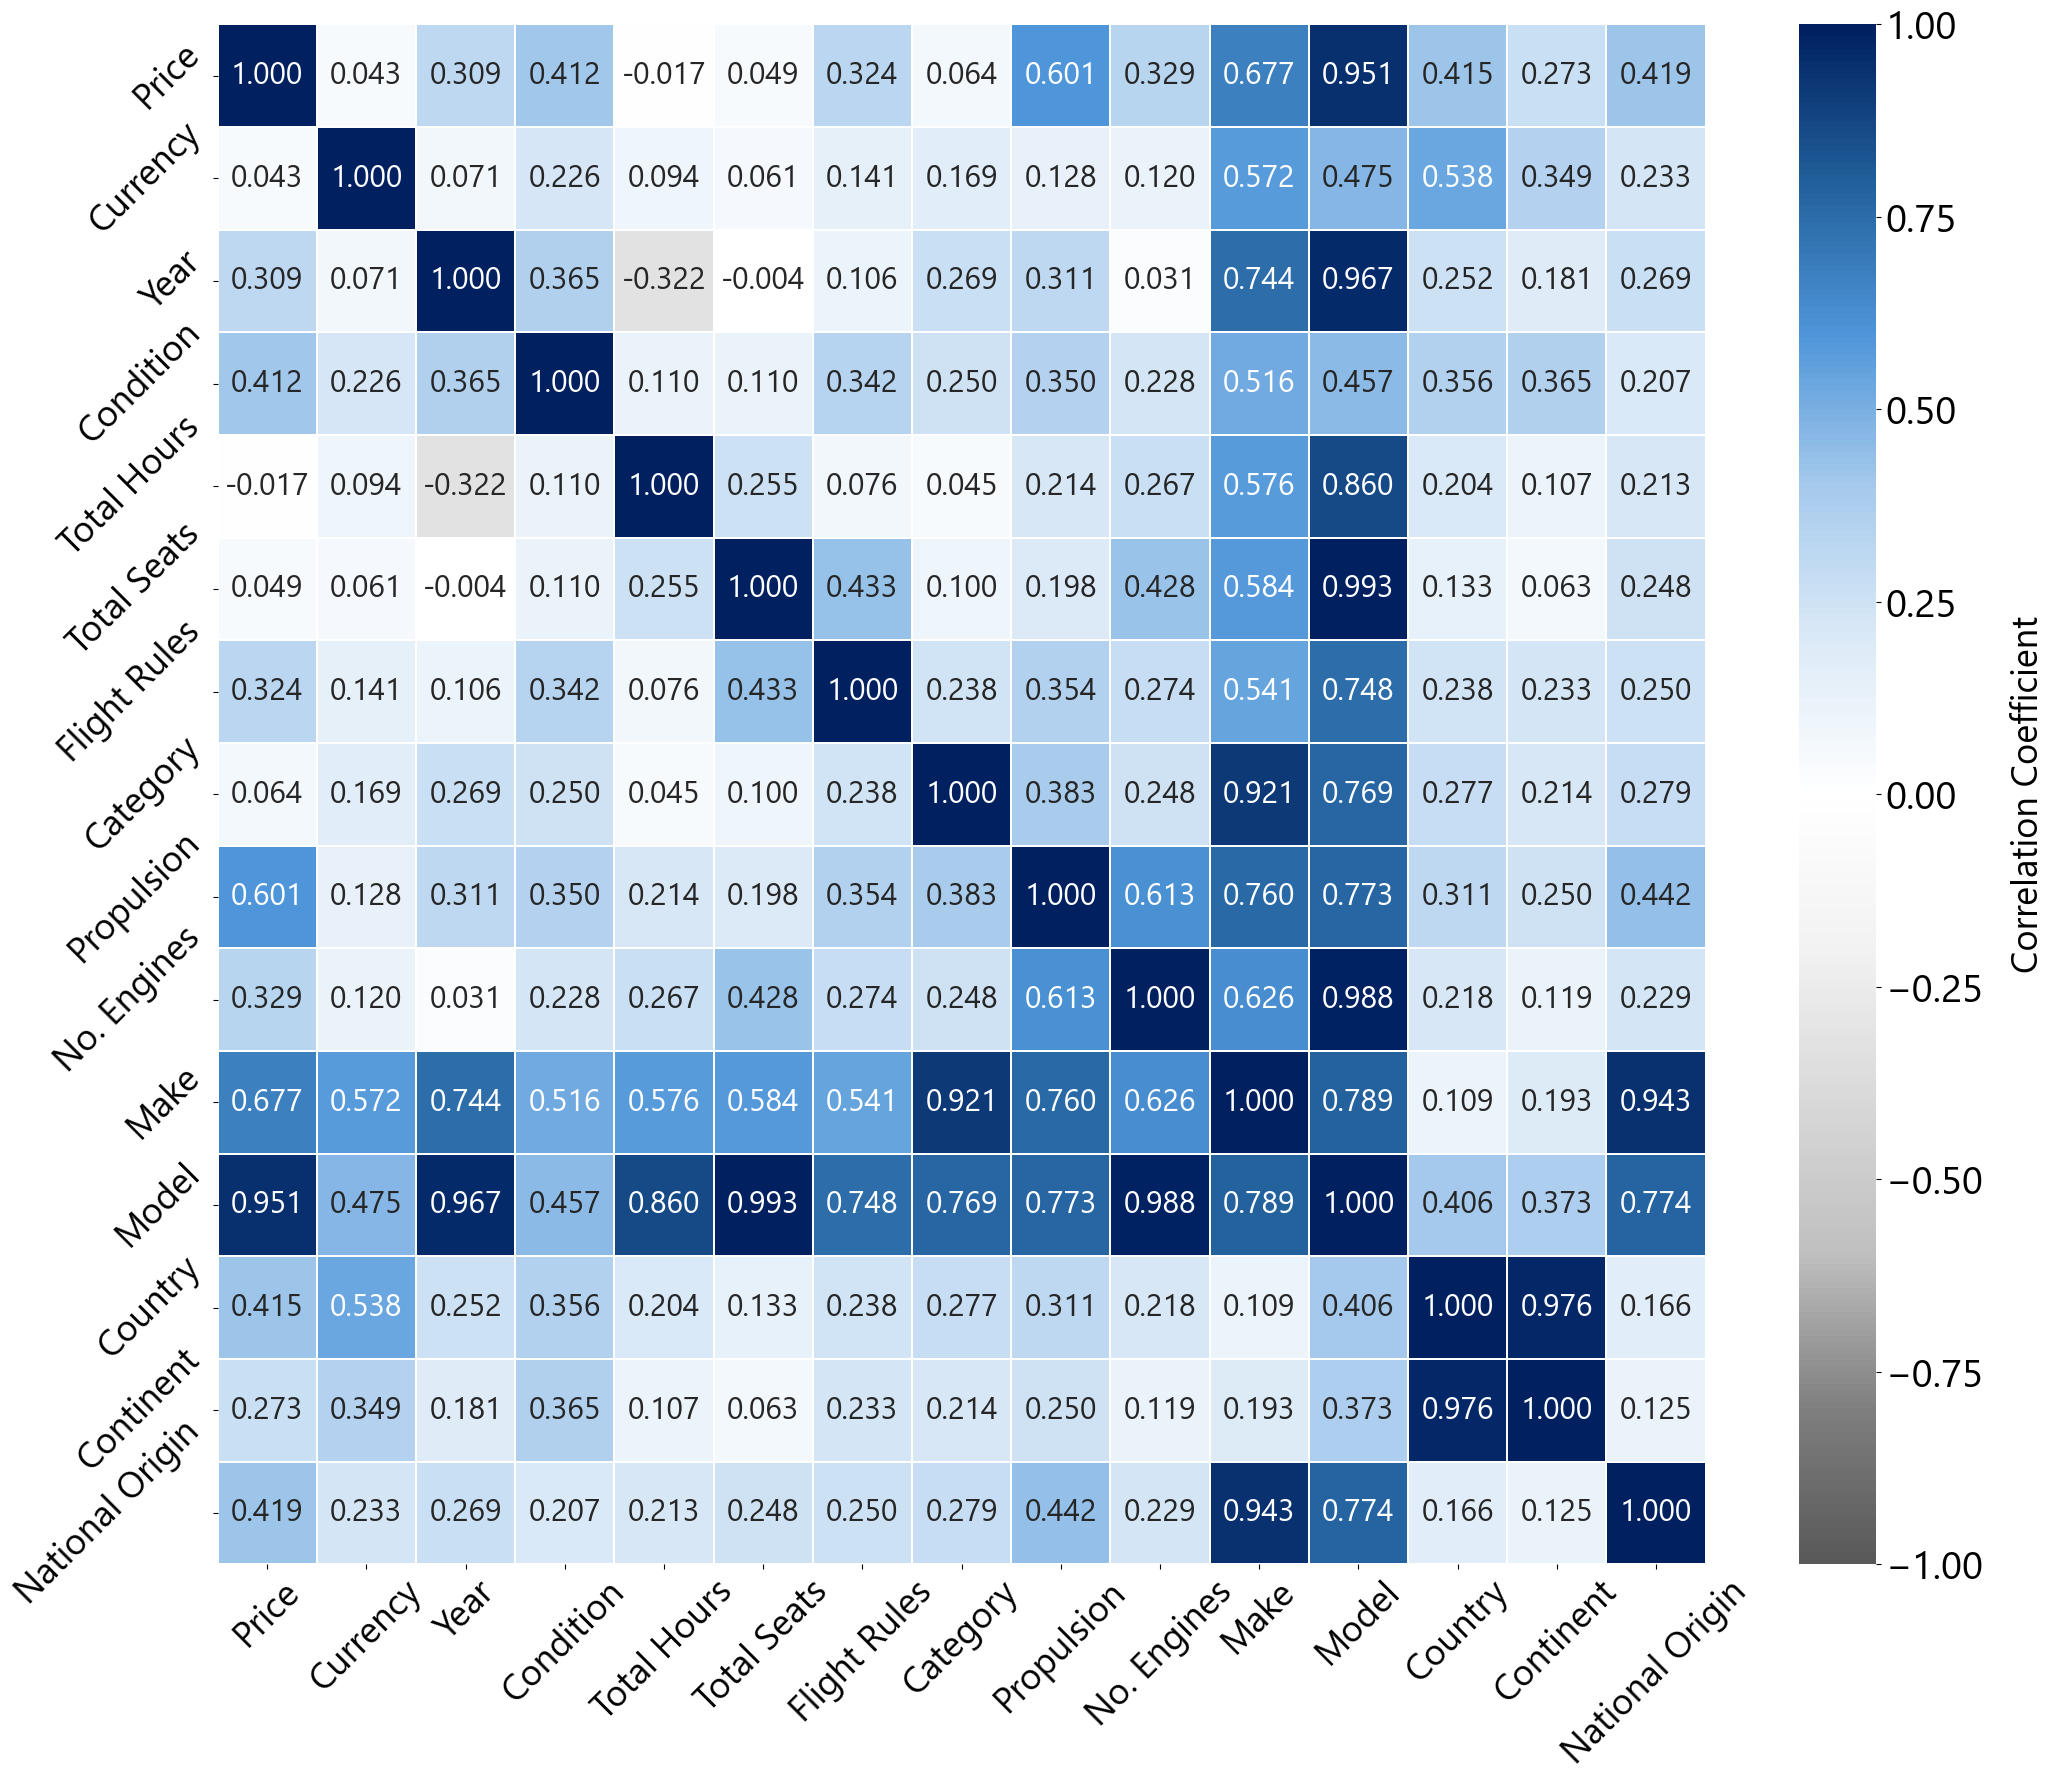

In [19]:
# Printing the correlation matrix

from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 20)) 

colors = ['#595959', '#7F7F7F', '#BFBFBF' , '#D9D9D9', '#F2F2F2', 'white', '#DCEAF7', '#A6CAEC', '#4E95D9', '#215F9A', '#002060']
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

fig = sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap=cmap, 
            vmin=-1, 
            vmax=1, 
            cbar_kws={'label': 'Correlation Coefficient'},  # Título de la barra de color
            fmt=".3f",  # Formato de tres decimales
            annot_kws={"size": 22},  # Tamaño de la letra en los cuadros
            linewidths=0.05)  # Para dar algo de espacio entre los cuadros

# Aumentar el tamaño de las etiquetas de los ejes X y Y
plt.xticks(fontsize=26, fontname="Segoe UI", rotation=45)
plt.yticks(fontsize=26, fontname="Segoe UI", rotation=45)

# Ajustar el tamaño de la barra de color
cbar = fig.collections[0].colorbar
cbar.ax.tick_params(labelsize=28)  # Cambiar el tamaño de los números de la barra de color
cbar.set_label('Correlation Coefficient', fontsize=26, fontname='Segoe UI', labelpad=20)  # Cambiar el tamaño del título de la barra de color

plt.show()


In [13]:
# # Remove not relevant columns
# df = df.drop(columns=['Currency', 'Category', 'Total Hours', 'Total Seats'])
# # Save the Missing Data Treated DataFrame into a CSV file
# df.to_csv(r'C:\Users\Ángela Martín Milán\Desktop\TFM\FeaturesSelected.csv', index=False)

Code for feature engineering techniques

In [ ]:
# # ENCODE CATEGORIC FEATURES - Personalised

# from sklearn.preprocessing import OneHotEncoder

# # Select categoric and numeric columns
# numerical_features = df.select_dtypes(include=['Int32', 'Int64', 'Float64']).columns
# numerical_df = df[numerical_features]

# cat_features_1 = ['Condition']
# cat_features_df1 = df[cat_features_1]
# cat_features_2 = ['Flight Rules', 'National Origin', 'Country', 'Continent']
# cat_features_df2 = df[cat_features_2]
# cat_features_3 = ['Propulsion', 'Make', 'Model']
# cat_features_df3 = df[cat_features_3]

# cat_order = ['Project', 'New', 'Used', 'No information']
# encoded_cat_df1 = pd.Categorical(cat_features_df1['Condition'], categories=cat_order, ordered=True)
# encoded_cat_df1 = pd.DataFrame({'Condition_Encoded': encoded_cat_df1.codes})

# encoder = OneHotEncoder(drop='first', sparse=False)
# encoded_categorical = encoder.fit_transform(cat_features_df2)
# encoded_cat_df2 = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(cat_features_2))

# # Target Encoding
# target = 'Price'
# encoded_cat_df3 = cat_features_df3.copy()
# for col in cat_features_3:
#     encoded_cat_df3[col] = encoded_cat_df3[col].map(df.groupby(col)[target].mean())


# df_encoded = pd.concat([encoded_cat_df1, encoded_cat_df2, encoded_cat_df3, numerical_df], axis=1)


In [ ]:
# # ENCODE CATEGORIC FEATURES

# from sklearn.preprocessing import OneHotEncoder
# import category_encoders as ce

# # Select categoric and numeric columns
# categorical_features = df.select_dtypes(include=['object', 'category']).columns
# categorical_df = df[categorical_features]
# numerical_features = df.select_dtypes(include=['Int32', 'Int64', 'Float64']).columns
# numerical_df = df[numerical_features]


# # One-Hot Encoding
# encoder = OneHotEncoder(drop='first', sparse=False)
# encoded_categorical = encoder.fit_transform(categorical_df)
# encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))
# df_hot_encoded = pd.concat([encoded_categorical_df , numerical_df], axis=1)

# # Ordinal Encoding
# encoder = ce.OrdinalEncoder(cols=categorical_features)
# encoded_categorical_df = encoder.fit_transform(categorical_df)
# df_ordinal_encoded = pd.concat([encoded_categorical_df , numerical_df], axis=1)

# # Binary Encoding
# encoder = ce.BinaryEncoder(cols=categorical_features)
# encoded_categorical_df = encoder.fit_transform(categorical_df)
# df_binary_encoded = pd.concat([encoded_categorical_df , numerical_df], axis=1)

# # Count Encoding
# encoded_categorical_df = categorical_df.copy()
# for col in categorical_features:
#    encoded_categorical_df[col] = encoded_categorical_df[col].map(encoded_categorical_df[col].value_counts())
# df_numeric_encoded = pd.concat([encoded_categorical_df, numerical_df], axis=1)

# # Target Encoding
# target = 'Price'
# encoded_categorical_df = categorical_df.copy()
# for col in categorical_features:
#     encoded_categorical_df[col] = encoded_categorical_df[col].map(df.groupby(col)[target].mean())
# df_numeric_encoded = pd.concat([encoded_categorical_df, numerical_df], axis=1)

# #print(df_encoded.columns)

In [ ]:
# # TRANSFORMATIONS

# #Log
# df_encoded_transf['Price_transf'] = np.log1p(df_encoded['Price'])

# y_pred = np.expm1(y_pred)
# y_test_original = np.expm1(y_test)

# # Reciprocal
# df_encoded_transf['Price_transf'] = 1 / df_encoded['Price']

# y_pred = 1 / y_pred
# y_test_original = 1 / y_test


# # Squared
# df_encoded_transf['Price_transf'] = df_encoded['Price'] ** 2  

# y_pred = np.sqrt(np.maximum(y_pred, 1e-6))
# y_test_original = np.sqrt(y_test)


# # Squared Root
# df_encoded_transf['Price_transf'] = np.sqrt(np.maximum(df_encoded['Price'], 0))

# y_pred = np.square(y_pred)
# y_test_original = np.square(y_test)

# # Box - Cox
# df_encoded_transf['Price_transf'], lambda_bc = boxcox(np.maximum(df_encoded['Price'], 1e-5))

# if lambda_bc == 0:
#     y_pred = np.expm1(y_pred) 
#     y_test_original = np.expm1(y_test)
# else:
#     y_pred = (lambda_bc * y_pred + 1) ** (1 / lambda_bc) 
#     y_test_original = (lambda_bc * y_test + 1) ** (1 / lambda_bc)

NameError: name 'df_encoded_transf' is not defined